In [2]:
# Шаг 1: Создадим дата-фреймы из CSV файлов и сохраним их в переменные
import pandas as pd 

df_orders = pd.read_csv('csvs/df_orders.csv')
df_order_status = pd.read_csv('csvs/df_order_status.csv')
df_products = pd.read_csv('csvs/df_products.csv')

In [30]:
# Шаг 2: Посчитаем количество заказов в каждый день и определим день с наибольшим количеством заказов
df_orders['date'] = pd.to_datetime(df_orders['date']) #Переведем дату в правильный формат

#Сгруппируем данные по дням и посчитаем количество заказов в каждый день
orders_per_day = df_orders.groupby('date',as_index=False)\
.agg({'order_id':'nunique'})\
.rename(columns={'order_id':'orders'})\
.sort_values('orders',ascending =False) #Сгруппируем данные по дням и посчитаем количество заказов в каждый день

max_order_date = df_orders.loc[13, 'date'] #Индекс у дня с максимальным количеством заказов: 13. Используем его

print(orders_per_day)
print(f'День с наибольшим количеством заказов: {max_order_date}')

         date  orders
13 2024-03-14      34
12 2024-03-13      24
0  2024-03-01      22
28 2024-03-29      19
4  2024-03-05      18
26 2024-03-27      18
14 2024-03-15      17
25 2024-03-26      17
21 2024-03-22      16
11 2024-03-12      15
18 2024-03-19      15
6  2024-03-07      14
5  2024-03-06      14
19 2024-03-20      14
20 2024-03-21      13
27 2024-03-28      12
17 2024-03-18      12
10 2024-03-11      12
3  2024-03-04      10
24 2024-03-25       9
9  2024-03-10       3
16 2024-03-17       3
22 2024-03-23       3
15 2024-03-16       2
23 2024-03-24       2
29 2024-03-30       2
1  2024-03-02       2
8  2024-03-09       1
7  2024-03-08       1
2  2024-03-03       1
30 2024-03-31       1
День с наибольшим количеством заказов: 2024-03-14 00:00:00


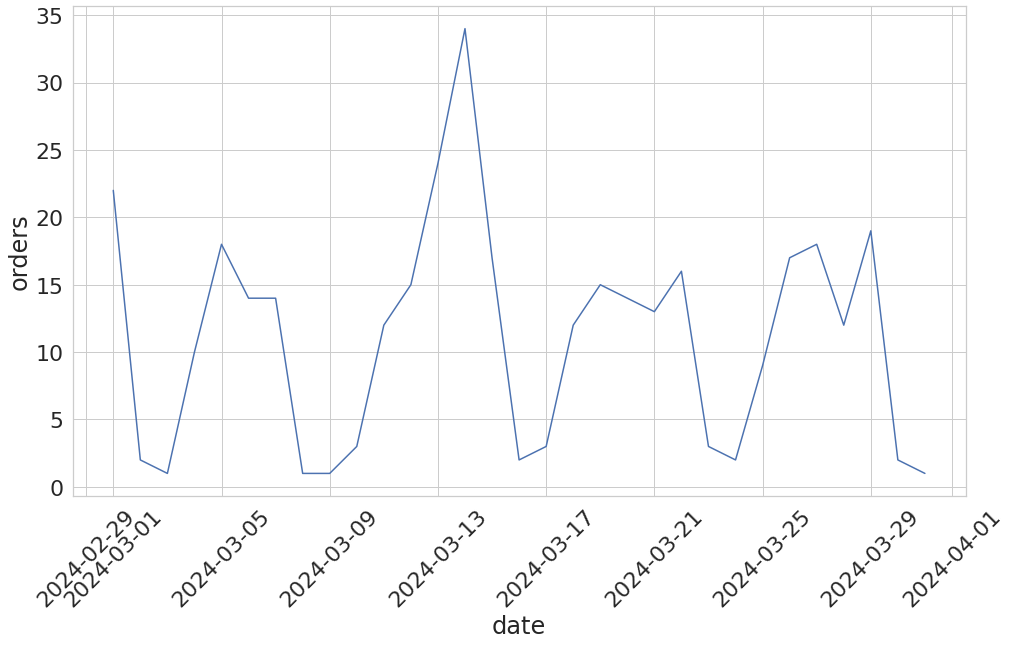

In [33]:
# Шаг 3: Построим график с количеством заказов и посмотрим заметна ли сезонность в данных
import seaborn as sns
import matplotlib.pyplot as plt #Импортируем необходимые библиотеки

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(16, 9)}
)

sns.lineplot(data=orders_per_day, x='date', y='orders');
plt.xticks(rotation=45);

#Вывод: по выходным почти нет заказов

In [38]:
#Шаг 4: Определим, есть ли еще день/дни, который/которые выбивается из общей картины
orders_per_day 
#Можем увидеть, что по пятницам у нас много заказов, но 8 марта - исключение, так как это праздничный нерабочий день

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
14,2024-03-15,17
25,2024-03-26,17
21,2024-03-22,16
11,2024-03-12,15


In [40]:
#Шаг 5: Необходимо выяснить, почему количество заказов резко выросло, чтобы число заказов и дальше росло
orders_status = df_orders.merge(df_order_status, on='order_id') #Добавим к данным о заказах еще и их статусы
orders_status.head(10) #Посмотрим, что получилось 

,order_id,product_id,quantity,manager,date,client_id,status
0,ABID-18767701,72,30,Маргарита Камертонова,2024-03-11,44,confirmed
1,ABID-18767701,509,40,Маргарита Камертонова,2024-03-11,44,confirmed
2,ABID-18767701,555,26,Маргарита Камертонова,2024-03-11,44,confirmed
3,ABID-18767701,557,30,Маргарита Камертонова,2024-03-11,44,confirmed
4,ABID-18767701,569,28,Маргарита Камертонова,2024-03-11,44,confirmed
5,ABID-18767701,634,20,Маргарита Камертонова,2024-03-11,44,confirmed
6,ABID-18767701,644,26,Маргарита Камертонова,2024-03-11,44,confirmed
7,ABID-18767701,673,40,Маргарита Камертонова,2024-03-11,44,confirmed
8,ABID-18767701,766,22,Маргарита Камертонова,2024-03-11,44,confirmed
9,ABID-18767701,780,20,Маргарита Камертонова,2024-03-11,44,confirmed


In [44]:
#Шаг 6: Посмотрим на соотношение подтвержденных и отменненых заказов в долях
orders_status[['order_id', 'status']].drop_duplicates().value_counts('status',normalize=True).round(2)

status
confirmed    0.89
canceled     0.11
dtype: float64

In [50]:
#Шаг 7: Посчитаем количество подтвержденных и отменненых заказов на каждый день. Создадим сводную таблицу, чтобы определить в какой день не было ни одного подтвержденного заказа
orders_per_day_status = orders_status.groupby(['date', 'status'], as_index=False)\
                                        .aggregate({'order_id': 'nunique'})\
                                        .rename(columns={'order_id':'orders'})

orders_pivot = orders_per_day_status.pivot(index='date', columns='status', values='orders').fillna(0) #создадим сводную таблицу
orders_pivot[['canceled', 'confirmed']] = orders_pivot.astype({'canceled':'int', 'confirmed':'int'}) #переведем данные в столбцах в формат integer
orders_pivot.query('confirmed == 0') #найдем день, когда заказов не было: 9 марта

status,canceled,confirmed
date,,
2024-03-09,1,0


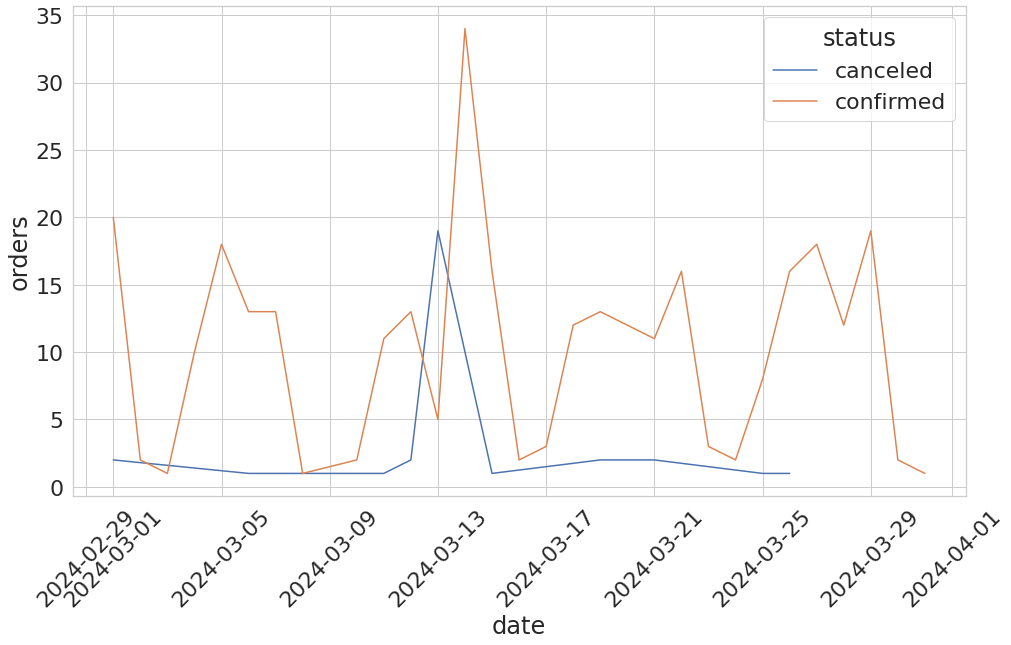

In [54]:
#Шаг 8: Построим график с заказами по дням в разбивке по статусу заказа, 
#посмотрим на день с наибольшим количеством заказов и на день, предшествующий ему ранее подробнее и сделаем вывод 

sns.lineplot(data=orders_per_day_status, x='date', y='orders', hue='status');
plt.xticks(rotation=45);

#Сделаем вывод, что в день с наибольшим количеством заказов было много успешных заказов
#В день, предшествующий ему, было много отмен

In [58]:
#Шаг 9: Рассмотрим эти два дня подробнее и сформируем гипотезу 

#Отберем заказы, сделанные 13 марта
orders_canceled_march_13 = orders_status\
    .loc[(orders_status['date'] == '2024-03-13') & (orders_status['status'] == 'canceled')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

#Отберем заказы, сделанные 14 марта
orders_confirmed_march_14 = orders_status\
    .loc[(orders_status['date'] == '2024-03-14') & (orders_status['status'] == 'confirmed')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

#Объединим эти 2 даты по совпадающим характеристикам и попробуем выяснить какие заказы были отменены в первый день и переоформлены во второй
canceled_and_again_confirmed_orders = pd.merge(df_canceled_march_13, df_confirmed_march_14, 
on=['product_id','manager', 'client_id', 'quantity'], how='inner')

#Посчитаем долю заказов, которые были переоформлены 14 марта от всех заказов, оформленных 14 марта
canceled_and_again_confirmed_orders.shape[0] / orders_confirmed_march_14.shape[0]

#Вывод: Скорее всего, произошел сбой в системе CRM, что не позволило клиентам подтвердить заказ

0.47058823529411764

In [80]:
#Шаг 10: Нам нужно рассчитать ключевые метрики, но так, как стоимость товара стоит в долларах США, 
#а компания продает их в рублях, поэтому создадим датафрейм с курсом на каждую дату и рассчитаем средний курс доллара
currency = []
file = 'csvs/usd_rate.txt'
with open(file) as f:
    for line in f:
        currency.append(line) #запишем курс доллара в список
        
currency_per_date = pd.DataFrame(currency, columns=['temp']) #Создадим датафрейм с курсом доллара

#Создадим колонки
currency_per_date['date'] = currency_per_date['temp'].apply(lambda x: x.split(',')[0])
currency_per_date['currency_rate'] = currency_per_date['temp'].apply(lambda x: float(x.split(',')[1]))

currency_per_date['date'] = pd.to_datetime(currency_per_date['date']) #Переведем дату в нужный формат
currency_per_date = currency_per_date.drop(columns = 'temp') #Удалим ненужную колонку

currency_per_date.currency_rate.mean().round(2) #Найдем средний курс доллара за эти дни

91.7

In [86]:
#Шаг 11: Подсчитаем общую выручку

df_full = orders_status.merge(df_products, left_on='product_id', right_on='id') 
df_full = df_full.merge(currency_per_date, on='date') #Объединим датафреймы и создадим единный датафрейм

df_full['price_rub'] = df_full['price'] * df_full['currency_rate'] #Посчитаем стоимость в рублях
df_full['revenue'] = df_full['price_rub'] * df_full['quantity'] #Посчитаем выручку в рублях

orders_confirmed = df_full[df_full['status'] == 'confirmed'] #Найдем подтвержденные заказы
orders_confirmed['revenue'].sum().round(2) #Посчитаем выручку по подтвержденным заказам

2038231821.56

In [87]:
#Шаг 12: Посчитаем средний чек

(orders_confirmed['revenue'].sum() / orders_confirmed['order_id'].nunique()).round(2)

6596219.49

In [89]:
#Шаг 13: Посмотрим, какие бренды наиболее востребованы, но для начала посмотрим сколько всего у нас записей о брендах

df_full['brand'] = df_full['name'].str.split(',').apply(lambda x: x[0]) #Создадим колонку с названиями брендов

df_full.brand.nunique() #Посмотрим, сколько всего брендов у нас есть (уникальных)

121

In [93]:
#Шаг 14: Посмотрим, какой бренд принес наибольшую выручку

brands = df_full.query("status == 'confirmed'")\
                .groupby(['brand'], as_index=False)\
                .aggregate({'revenue': 'sum', 'order_id': 'nunique'})\
                .rename(columns={'order_id':'orders'})\
                .sort_values('revenue', ascending=False)

brands.sort_values('orders', ascending=False).head(1) #Отсортируем по количеству заказов и посмотрим на первую строчку датафрейм

#Вывод: Бренд JBL принес больше всего выручки

,brand,revenue,orders
46,JBL,2.665961e+08,264


In [95]:
#Шаг 15: Определим, какие бренды заказывают редко, хотя товаров у этих брендов много, 
#но сначала определим какие товары заказывали, а какие нет

products_in_orders = orders_confirmed['product_id'].unique()

#Отметим товары отметкой "yes", если они были заказаны в этом месяце и "no", если не были
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')

df_products['is_in_orders'].value_counts() #Посмотрим на соотношение: примерно треть товаров не заказывали в этом месяце



,id,name,price,category,is_in_orders
0,1,"AKG, D5",180.46,Динамический микрофон,no
1,2,"AKG, D40",85.80,Динамический микрофон,yes
2,3,"AKG, C414 XLII",935.11,Конденсаторный микрофон,no
3,4,"AKG, C214",356.02,Конденсаторный микрофон,yes
4,5,"AKG, P120",86.13,Конденсаторный микрофон,no
...,...,...,...,...,...
1672,1673,"Yamaha, NS-C210",86.80,Центральный канал,yes
1673,1674,"Yamaha, NS-C210BL",75.98,Центральный канал,yes
1674,1675,"Yamaha, NS-C444",165.50,Центральный канал,yes
1675,1676,"Yamaha, NS-C700",307.89,Центральный канал,yes


In [110]:
#Шаг 16: Определим бренды

df_products['brand'] = df_products['name'].str.split(',').apply(lambda x: x[0]) #Выделим название бренда

brands_with_0_orders = df_products.groupby(['brand', 'is_in_orders'], as_index=False)\
                            .aggregate({'id': 'nunique'})\
                            .rename(columns={'id':'products'}) #Сгруппируем по брендам

brands_with_0_orders_pivot = brands_with_0_orders.pivot(index='brand', columns='is_in_orders', values='products')\
.fillna(0)\
.reset_index() #Построим сводную таблицу
brands_with_0_orders_pivot

#Добавим столбец с общим количеством
brands_with_0_orders_pivot['total'] = brands_with_0_orders_pivot['no'] + brands_with_0_orders_pivot['yes'] 

#Посчитаем долю товаров, которые ни разу не заказывали
brands_with_0_orders_pivot['no_ratio'] = brands_with_0_orders_pivot['no'] / brands_with_0_orders_pivot['total'] 

#Отфильтруем бренды у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда
#но бренды, у которых товаров меньше 15 учитывать не будем, так как они не захламляют виртуальную полку

brands_with_0_orders_pivot.query('total > 15 and no_ratio > 0.5').brand.to_list() #Поместим эти бренды в список

['Dali', 'KEF', 'Marantz', 'Pioneer']